# Google Colab Lab Assignment 5 -Time Series Forecasting using LSTM

**Course Name:** Deep Learning Lab

**Lab Title:** Time Series Forecasting using LSTM

**Student Name:** Suryansh Ambekar

**Student ID:** 202201090042

**Date of Submission:** 14 April 2025

**Group Members**: Kaustubh Mahajan and Ayush Fating


**Objective**
The purpose of this lab is to understand and implement Time Series Forecasting using LSTM for real-time prediction adn forecasting. Students will perform dataset preparation, model implementation, inference, and performance evaluation.




# Experiment 5.1: Time Series Forecasting using LSTM

**Objective: To forecast future values of a univariate time series using LSTM-based models.**

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohanrao/nifty50-stock-market-data")

print("Path to dataset files:", path)

100%|██████████| 18.4M/18.4M [00:00<00:00, 139MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rohanrao/nifty50-stock-market-data/versions/15


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [4]:
# Load a single stock file (e.g., RELIANCE.csv)
df = pd.read_csv(f"{path}/RELIANCE.csv")

# Use closing price
data = df['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Define sequence length
seq_len = 60

# Create sequences
X, y = [], []
for i in range(seq_len, len(scaled_data)):
    X.append(scaled_data[i-seq_len:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

# Reshape for LSTM [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - loss: 0.0148 - val_loss: 0.0010
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 6.6231e-04 - val_loss: 7.0873e-04
Epoch 3/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - loss: 4.7221e-04 - val_loss: 6.2190e-04
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 3.8399e-04 - val_loss: 8.7531e-04
Epoch 5/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 3.7612e-04 - val_loss: 0.0010
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 4.1854e-04 - val_loss: 5.9092e-04
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - loss: 3.0855e-04 - val_loss: 4.3524e-04
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 3.0061e-04 - val_loss: 4.1906e-04
Epoch 9/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 3.4215e-04 - val_loss: 3.8120e-04
Epoch 10/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 2.9811e-04 - val_loss: 3.8303e-04
Epoch 11/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - 

In [11]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


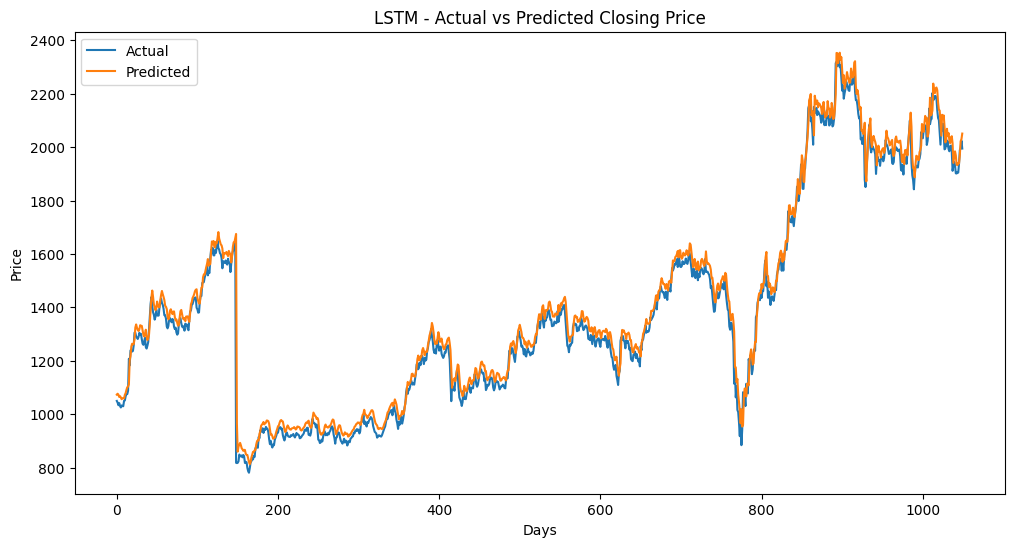

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('LSTM - Actual vs Predicted Closing Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [13]:
rmse = np.sqrt(mean_squared_error(actual, predictions))
mae = mean_absolute_error(actual, predictions)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Root Mean Squared Error (RMSE): 48.48673293012694
Mean Absolute Error (MAE): 33.89085957263765


# Experiment 5.2:  Sequence Text Prediction using LSTM

**Objective: To generate next characters/words based on a given input sequence using LSTM.**

In [14]:
!pip install tensorflow tensorflow_datasets

import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt


In [19]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shubhammaindola/harry-potter-books")

print("Path to dataset files:", path)

100%|██████████| 2.28M/2.28M [00:00<00:00, 101MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shubhammaindola/harry-potter-books/versions/1


In [33]:
# Use only the first book
with open(os.path.join(path, "01 Harry Potter and the Sorcerers Stone.txt"), "r", encoding="utf-8") as f:
    all_text = f.read()

print(f"Using {len(all_text)} characters from Book 1")


Using 439478 characters from Book 1


In [34]:
import numpy as np
import tensorflow as tf

# Create mapping from characters to integers
vocab = sorted(set(all_text))
char2idx = {u: i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

# Encode entire text
text_as_int = np.array([char2idx[c] for c in all_text])

In [35]:
seq_length = 100
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

sequences = char_dataset.batch(seq_length + 1, drop_remainder=True)

def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)
BATCH_SIZE = 32
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [37]:
vocab_size = len(vocab)
embedding_dim = 128
rnn_units = 256

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.LSTM(rnn_units, return_sequences=True, stateful=True, recurrent_initializer='glorot_uniform'),  # batch_input_shape is moved here
    tf.keras.layers.Dense(vocab_size)
])

In [38]:
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

model.compile(optimizer='adam', loss=loss)

# Train the model
history = model.fit(dataset, epochs=10)


Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 558ms/step - loss: 3.4492
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 38s 551ms/step - loss: 2.4899
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 38s 556ms/step - loss: 2.2526
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 38s 553ms/step - loss: 2.1202
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 38s 557ms/step - loss: 2.0200
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 38s 550ms/step - loss: 1.9417
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 41s 554ms/step - loss: 1.8707
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 37s 542ms/step - loss: 1.8238
Epoch 9/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 40s 578ms/step - loss: 1.7693
Epoch 10/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 38s 548ms/step - loss: 1.7337


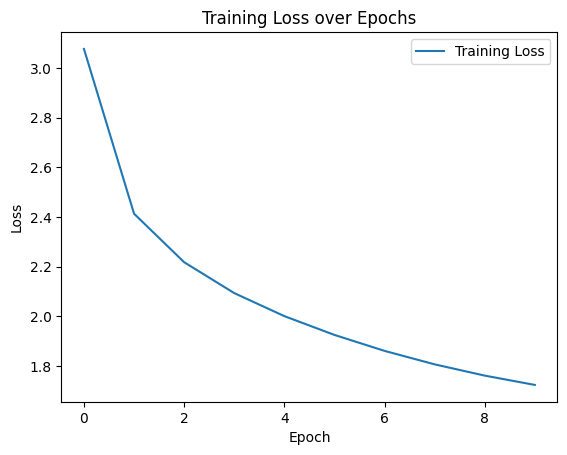

In [39]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

In [43]:
import tensorflow as tf

def generate_text(model, start_string, gen_length=500):
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)

    text_generated = []
    temperature = 1.0

    # Remove or comment out the following line:
    # model.reset_states()
    for _ in range(gen_length):
        predictions = model(input_eval)
        predictions = predictions[:, -1, :] / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()

        input_eval = tf.expand_dims([predicted_id], 0)
        text_generated.append(idx2char[predicted_id])

    # Corrected indentation:
    return start_string + ''.join(text_generated)

# Example output
print(generate_text(model, start_string="Harry turned around and"))

Harry turned around and the Flilienoir fimuget, Duesle to spark!”

“Gryffildoly; soudle, had to put inso look, noing that to sty you like’s sar ceall,” said the chanded as into oything?

“I’ve one sase trams.

“I’ve pay, and their toald be been comesthey, rabled the loom.

It fo, the hlougeln austhing pach firs.”

But Harry datnened it a coul” handlay of up risted.

“In’s they nond lint heren to gerudned aallys wall outtleco’ges hom twight hild. an’t spaked rit morthen to Uncter.

“Weass was a whoce he cair set in the


# Experiment 5.3: Sequence Text Classification using LSTM

**Objective: To classify text sequences using LSTM-based models (e.g., sentiment or spam detection).**

In [45]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkarsabnis/yelp-reviews-dataset")

print("Path to dataset files:", path)
df = pd.read_csv(f"{path}/yelp.csv")
df.head()

Path to dataset files: /kaggle/input/yelp-reviews-dataset


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [46]:
# Drop neutral (3-star) reviews
df = df[df['stars'] != 3]

# Binary sentiment label: 1 if stars > 3, else 0
df['sentiment'] = df['stars'].apply(lambda x: 1 if x > 3 else 0)

# Keep only relevant columns
df = df[['text', 'sentiment']]
print(df.head())


                                                text  sentiment
0  My wife took me here on my birthday for breakf...          1
1  I have no idea why some people give bad review...          1
2  love the gyro plate. Rice is so good and I als...          1
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...          1
4  General Manager Scott Petello is a good egg!!!...          1


<ipython-input-46-7aa13cc13c5b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['stars'].apply(lambda x: 1 if x > 3 else 0)


In [48]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['text'])

sequences = tokenizer.texts_to_sequences(df['text'])
padded = pad_sequences(sequences, maxlen=200, padding='post', truncating='post')

X = padded
y = df['sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=200),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=3, batch_size=64)

Epoch 1/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 34s 310ms/step - accuracy: 0.7916 - loss: 0.5559 - val_accuracy: 0.7944 - val_loss: 0.5115
Epoch 2/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 39s 287ms/step - accuracy: 0.8061 - loss: 0.5033 - val_accuracy: 0.7944 - val_loss: 0.5056
Epoch 3/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 42s 300ms/step - accuracy: 0.8064 - loss: 0.4892 - val_accuracy: 0.7952 - val_loss: 0.5045


54/54 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step
              precision    recall  f1-score   support

           0       0.29      0.16      0.21       348
           1       0.81      0.90      0.85      1360

    accuracy                           0.75      1708
   macro avg       0.55      0.53      0.53      1708
weighted avg       0.70      0.75      0.72      1708



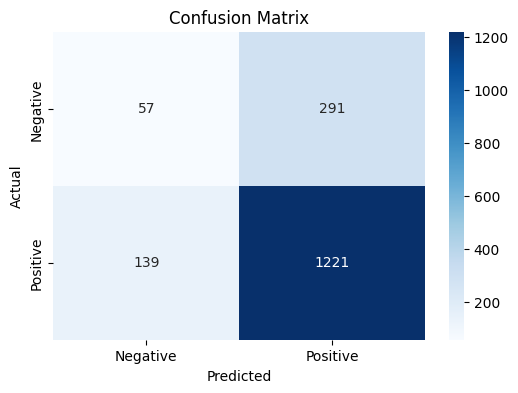

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Classification metrics
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


I, Suryansh Ambekar, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: https://github.com/Suryanshambekar

Signature: Suryansh Sanket Ambekar

